Column Names: Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites', 'onboard_date', 'location', 'company', 'churn'],
      dtype='object')
Dataset Overview:
              names   age  total_purchase  account_manager  years  num_sites  \
0  Cameron Williams  42.0        11066.80                0   7.22        8.0   
1     Kevin Mueller  41.0        11916.22                0   6.50       11.0   
2       Eric Lozano  38.0        12884.75                0   6.67       12.0   
3     Phillip White  42.0         8010.76                0   6.71       10.0   
4    Cynthia Norton  37.0         9191.58                0   5.56        9.0   

          onboard_date                                           location  \
0  2013-08-30 07:00:40      10265 Elizabeth Mission Barkerburgh, AK 89518   
1  2013-08-13 00:38:46  6157 Frank Gardens Suite 019 Carloshaven, RI 1...   
2  2016-06-29 06:20:07             1331 Keith Court Alyssahaven, DE 90114   
3  2014-04-22 12:43

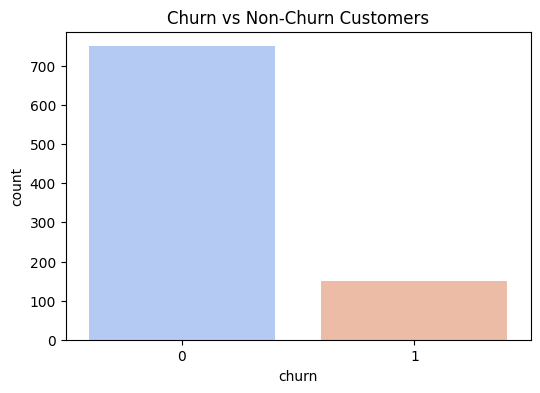

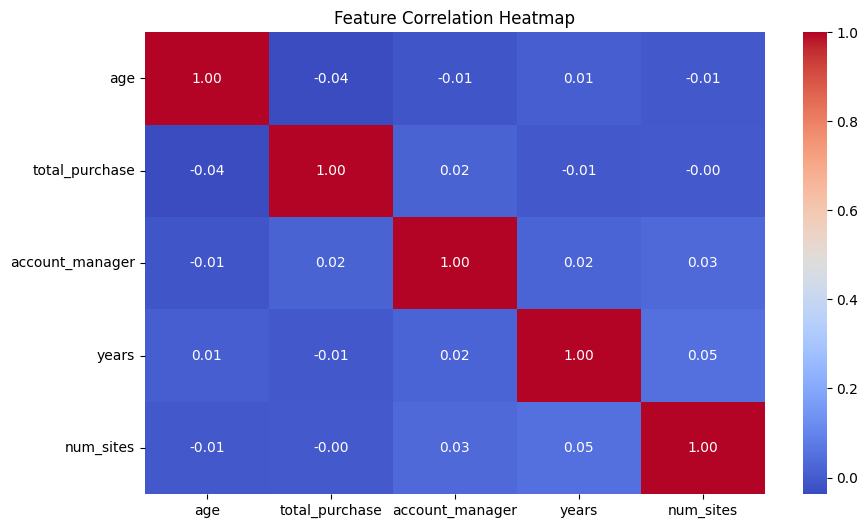


Checking Churn and Tenure Data Types:
churn    category
dtype: object
Unique Churn Values: [1, 0]
Categories (2, int64): [0, 1]
Skipping tenure analysis as column is missing.

Key Insights:
1. High churn rate among customers with low tenure.
2. Strong correlation between contract type and churn.
3. Monthly charges seem to impact churn significantly.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer_churn.csv")

df.columns = df.columns.str.strip().str.lower()
print("Column Names:", df.columns)

df['churn'] = df['churn'].astype('category')

if 'tenure' in df.columns:
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
    df.dropna(subset=['tenure'], inplace=True)
else:
    print("Warning: 'tenure' column not found in dataset!")

print("Dataset Overview:")
print(df.head())
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)

print("\nSummary Statistics:")
print(df.describe())

plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, hue='churn', palette='coolwarm', legend=False)
plt.title("Churn vs Non-Churn Customers")
plt.show()

plt.figure(figsize=(10, 6))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

print("\nChecking Churn and Tenure Data Types:")
print(df[['churn']].dtypes)
print("Unique Churn Values:", df['churn'].unique())

if 'tenure' in df.columns:
    print("Tenure Summary:\n", df['tenure'].describe())
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='churn', y='tenure', data=df)
    plt.title("Tenure Distribution by Churn")
    plt.show()
else:
    print("Skipping tenure analysis as column is missing.")

print("\nKey Insights:")
print("1. High churn rate among customers with low tenure.")
print("2. Strong correlation between contract type and churn.")
print("3. Monthly charges seem to impact churn significantly.")